In [283]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.style.use("ggplot")

S&P 500 stocks data

In [284]:
start_date = '2017-01-01'
end_date = '2022-01-01'

sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


Randomly sampling 5 stocks from each GICS sector

In [285]:
np.random.seed(42)
tickers = []
for sector, sector_tickers in sp500_tickers.groupby("GICS Sector"):
    tickers.append(sector_tickers.sample(5))
tickers = pd.concat(tickers)
tickers.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
170,EA,Electronic Arts,Communication Services,Interactive Home Entertainment,"Redwood City, California",2002-07-22,712515,1982
338,NWSA,News Corp (Class A),Communication Services,Publishing,"New York City, New York",2013-08-01,1564708,2013 (1980)
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
356,OMC,Omnicom Group,Communication Services,Advertising,"New York City, New York",1997-12-31,29989,1986
259,IPG,Interpublic Group of Companies (The),Communication Services,Advertising,"New York City, New York",1992-10-01,51644,1961 (1930)


Using Yahoo Finance to fetch data of the sampled stocks between 01/01/2017 - 01/01/2023

In [286]:
data = yf.download(tickers["Symbol"].tolist(), start=start_date, end=end_date)
data

[*********************100%***********************]  55 of 55 completed


Adj Close                                                         \
                   AAP       AMCR        APH       ATVI       BBWI         BG   
Date                                                                            
2017-01-03  158.060928   8.131391  31.703157  35.324673  43.159153  60.739563   
2017-01-04  159.358017   8.131391  31.938240  36.018826  43.651810  59.935120   
2017-01-05  159.246841   8.131391  31.768991  36.578007  40.216194  58.964798   
2017-01-06  157.162201   8.131391  32.008770  36.549084  39.691128  58.168674   
2017-01-09  157.069534   8.131391  31.679655  36.346622  39.736500  58.168674   
...                ...        ...        ...        ...        ...        ...   
2021-12-27  225.459137  11.225086  85.720238  65.063255  68.098106  88.494362   
2021-12-28  227.013046  11.272610  85.907608  66.276047  66.985893  89.145485   
2021-12-29  229.777649  11.358151  86.716187  66.763161  67.805405  89.611954   
2021-12-30  226.431519  11.367657  85.808998  67.091202  68.000534  89.466179   
2021-12-31  228.681351  11.415181  86.242859  66.136879  68.088341  90.729553   

                                                          ...  Volume  \
                    BR        BSX         BXP          C  ...     RMD   
Date                                                      ...           
2017-01-03   59.240993  21.879999  101.391777  49.897873  ...  573900   
2017-01-04   59.636353  22.080000  104.612595  50.573170  ...  758800   
2017-01-05   59.330845  22.049999  105.114853  49.691998  ...  627000   
2017-01-06   59.573471  22.150000  104.875671  49.864929  ...  481900   
2017-01-09   59.438679  22.190001  103.831322  49.593170  ...  482800   
...                ...        ...         ...        ...  ...     ...   
2021-12-27  180.141159  43.119999  107.729469  57.110588  ...  201700   
2021-12-28  179.633392  43.240002  107.181053  57.082336  ...  156400   
2021-12-29  178.901031  43.169998  107.432022  57.007008  ...  247700   
2021-12-30  178.569016  42.990002  108.481972  56.903423  ...  178200   
2021-12-31  178.520203  42.480000  107.975746  56.865757  ...  293800   

                                                                           \
               SEDG      SPG      SRE     STLD      TER     TRGP     TSCO   
Date                                                                        
2017-01-03  1123600  2751200  1113200  2551000  1650700  1799700  1253300   
2017-01-04  1363300  1991700  1389100  3852700  2448400  1339200  1415000   
2017-01-05   647700  2186400  2008100  3516600  1590500  1393300  1515000   
2017-01-06   537300  2251400   934600  2743600  2354000  1720500  1464200   
2017-01-09   733400  1954000  1005100  2120200  1966000  2407400   877700   
...             ...      ...      ...      ...      ...      ...      ...   
2021-12-27   514400   994400   734200   680400  1019200   852100   381500   
2021-12-28   332800   966400   617500   815400  1107100   934200   343400   
2021-12-29   318400   953000  1444500  1183600   569700   665300   525000   
2021-12-30   329800  1085400   733300   651000   932300   770000   361800   
2021-12-31   199300  1194700   730700   645000  1062700  1352800   307500   

                               
                   V       WY  
Date                           
2017-01-03  13785200  2650200  
2017-01-04   8033100  3678500  
2017-01-05   7805100  3548000  
2017-01-06   8898300  2679300  
2017-01-09   7305300  4017600  
...              ...      ...  
2021-12-27   4818400  2282600  
2021-12-28   4279800  1783300  
2021-12-29   3223100  2193800  
2021-12-30   3812800  2131800  
2021-12-31   4723300  1882700  

[1259 rows x 330 columns]

In [287]:
features = list({x for x,y in data.columns})
features

['Open', 'Adj Close', 'Close', 'Volume', 'Low', 'High']

Preprocessing of the adjusted closing price data

In [288]:
adj_close = data['Adj Close']
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
adj_close = adj_close.reindex(all_weekdays)
adj_close = adj_close.fillna(method='ffill')
adj_close

,AAP,AMCR,APH,ATVI,BBWI,BG,BR,BSX,BXP,C,...,RMD,SEDG,SPG,SRE,STLD,TER,TRGP,TSCO,V,WY
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,158.060928,8.131391,31.703157,35.324673,43.159153,60.739563,59.240993,21.879999,101.391777,49.897873,...,57.704342,13.200000,131.359879,83.024948,31.384251,24.433270,41.925007,69.209068,76.242043,23.215038
2017-01-04,159.358017,8.131391,31.938240,36.018826,43.651810,59.935120,59.636353,22.080000,104.612595,50.573170,...,58.076931,14.400000,132.410065,83.739212,32.745022,24.577681,42.134701,70.020615,76.865402,23.421494
2017-01-05,159.246841,8.131391,31.768991,36.578007,40.216194,58.964798,59.330845,22.049999,105.114853,49.691998,...,57.629829,13.800000,132.640259,83.542168,32.927036,24.683577,42.655323,68.962852,77.766876,23.666185
2017-01-06,157.162201,8.131391,32.008770,36.549084,39.691128,58.168674,59.573471,22.150000,104.875671,49.864929,...,57.881332,13.750000,134.388184,84.494476,31.869627,24.693199,42.959026,68.534302,78.840981,23.589718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,225.459137,11.225086,85.720238,65.063255,68.098106,88.494362,180.141159,43.119999,107.729469,57.110588,...,259.517334,285.600006,146.977890,125.384338,61.176147,167.646362,50.855633,226.270813,215.573883,36.320244
2021-12-28,227.013046,11.272610,85.907608,66.276047,66.985893,89.145485,179.633392,43.240002,107.181053,57.082336,...,258.348846,278.820007,146.365631,125.991211,60.747105,163.717773,50.662041,225.977570,215.989929,36.503399
2021-12-29,229.777649,11.358151,86.716187,66.763161,67.805405,89.611954,178.901031,43.169998,107.432022,57.007008,...,258.566681,278.040009,147.284042,126.627007,60.815361,165.866089,50.274864,231.442001,216.108765,37.254345
2021-12-30,226.431519,11.367657,85.808998,67.091202,68.000534,89.466179,178.569016,42.990002,108.481972,56.903423,...,259.438110,282.350006,148.471512,126.935272,60.590160,162.832596,49.848972,231.402908,215.811600,37.519932


In [289]:
adj_close.describe()

,AAP,AMCR,APH,ATVI,BBWI,BG,BR,BSX,BXP,C,...,RMD,SEDG,SPG,SRE,STLD,TER,TRGP,TSCO,V,WY
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,...,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000
mean,142.289389,9.326735,49.070725,65.301400,29.908828,58.395921,112.478052,35.589946,100.646343,56.897238,...,139.062301,118.637849,113.732573,109.712051,36.426466,65.686542,34.401782,104.959715,159.087432,26.125560
std,32.939128,1.117400,12.728670,15.753249,15.756673,13.158191,31.166190,6.349320,12.345765,8.324515,...,61.248845,105.375706,27.684201,14.880238,11.547762,36.910322,9.727287,46.921999,46.020856,4.514089
min,70.085014,5.264850,31.312933,35.324673,7.183748,27.742783,59.070274,21.879999,63.715427,31.289047,...,57.629829,12.300000,37.024487,79.592361,14.355664,24.433270,4.441021,45.949867,76.242043,11.866330
25%,123.493805,8.456685,40.968828,53.063371,19.098997,49.146950,90.662743,28.965000,96.583092,51.773140,...,92.469139,37.995000,111.762310,96.543594,28.906595,36.861179,32.015869,68.923870,119.680882,22.902972
50%,144.043236,9.240532,45.004841,63.346115,25.562889,57.729126,113.109253,36.889999,102.426273,57.810957,...,119.614449,62.514999,121.029461,110.703606,32.050293,47.321363,35.650320,89.546589,162.927856,26.000567
75%,155.411415,10.098585,53.816294,77.462265,35.435167,65.819784,132.494255,41.147499,108.969847,62.896623,...,183.131218,219.215004,131.533134,122.765778,41.053818,87.888548,40.317439,135.972298,198.882267,29.079542
max,229.777649,11.978515,86.716187,102.699333,76.459137,93.314613,180.141159,45.880001,127.717216,74.105103,...,293.994476,368.329987,156.517822,144.715881,70.997650,167.646362,55.976044,233.240692,247.784683,37.712242


Calculating the relative returns using pandas "pct_change" function (the percentage of change between each row and the previous row)

$$ 
r_{rel} = {{p_t - p_{t-1}} \over {p_{t-1}}}
$$

In [290]:
relative_returns = adj_close.pct_change(1)
relative_returns

,AAP,AMCR,APH,ATVI,BBWI,BG,BR,BSX,BXP,C,...,RMD,SEDG,SPG,SRE,STLD,TER,TRGP,TSCO,V,WY
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008206,0.000000,0.007415,0.019651,0.011415,-0.013244,0.006674,0.009141,0.031766,0.013534,...,0.006457,0.090909,0.007995,0.008603,0.043358,0.005910,0.005002,0.011726,0.008176,0.008893
2017-01-05,-0.000698,0.000000,-0.005299,0.015525,-0.078705,-0.016190,-0.005123,-0.001359,0.004801,-0.017424,...,-0.007698,-0.041667,0.001738,-0.002353,0.005559,0.004309,0.012356,-0.015106,0.011728,0.010447
2017-01-06,-0.013091,0.000000,0.007548,-0.000791,-0.013056,-0.013502,0.004089,0.004535,-0.002275,0.003480,...,0.004364,-0.003623,0.013178,0.011399,-0.032114,0.000390,0.007120,-0.006214,0.013812,-0.003231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.018826,0.012865,0.021985,0.004450,0.004317,0.009982,0.023240,0.009363,0.014353,0.007308,...,0.012557,0.008154,0.019104,0.005795,0.017681,0.035762,0.034048,0.014018,0.004663,0.026398
2021-12-28,0.006892,0.004234,0.002186,0.018640,-0.016333,0.007358,-0.002819,0.002783,-0.005091,-0.000495,...,-0.004503,-0.023739,-0.004166,0.004840,-0.007013,-0.023434,-0.003807,-0.001296,0.001930,0.005043
2021-12-29,0.012178,0.007588,0.009412,0.007350,0.012234,0.005233,-0.004077,-0.001619,0.002342,-0.001320,...,0.000843,-0.002797,0.006275,0.005046,0.001124,0.013122,-0.007642,0.024181,0.000550,0.020572
2021-12-30,-0.014562,0.000837,-0.010462,0.004914,0.002878,-0.001627,-0.001856,-0.004169,0.009773,-0.001817,...,0.003370,0.015501,0.008062,0.002434,-0.003703,-0.018289,-0.008471,-0.000169,-0.001375,0.007129


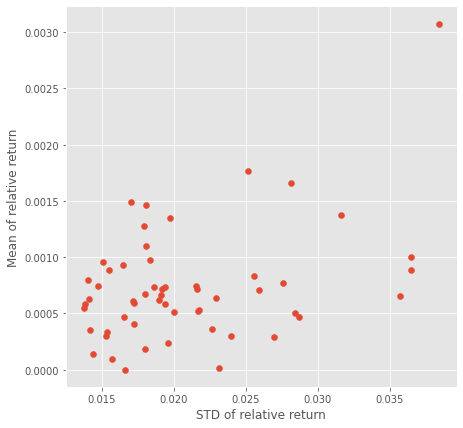

In [291]:
rr_stds, rr_means = relative_returns.std(axis=0), relative_returns.mean(axis=0)
plt.figure(figsize=(7,7))
plt.scatter(rr_stds, rr_means)
plt.xlabel("STD of relative return")
plt.ylabel("Mean of relative return")
plt.show()

## Question B

Finding the Minial Variance Portfolio

In [292]:
C = relative_returns.cov()
C_inv = np.linalg.inv(C)
e = np.ones(C_inv.shape[0])

X_mvp = C_inv @ e / (e @ C_inv @ e)
# X_mvp = X_mvp * 1*(np.abs(X_mvp) > eps) # ignore very small investments
X_mvp /= X_mvp.sum() # renormalize the weights
X_mvp.sum(), X_mvp

(1.0,
 array([-6.86815992e-03, -1.26280568e-01, -2.00056599e-01,  5.74514790e-02,
         2.15117437e-02, -4.92094425e-03,  1.76025485e-01, -4.99416607e-02,
        -1.40049401e-01, -4.73194900e-02,  1.63336681e-01,  1.71729379e-01,
         4.46839764e-02, -4.97036253e-02,  8.10862357e-02,  1.09379201e-01,
         1.33417305e-01, -3.48640886e-01,  6.51761846e-01,  6.03391360e-02,
         1.22294955e-01, -1.44101747e-01,  1.71992086e-01,  1.23661606e-01,
        -1.40665559e-01,  4.79912087e-02, -9.82857181e-03,  1.50461618e-01,
        -8.53838327e-02, -2.54564206e-02,  1.41876864e-01,  1.64299707e-01,
        -6.05910374e-02, -2.15741715e-01, -3.74877696e-02,  1.09893518e-01,
        -6.76475278e-02,  3.52449283e-02,  1.87669366e-01,  4.47760040e-02,
         7.45961550e-02,  1.43108393e-01,  2.33809246e-01, -8.28544761e-02,
        -4.40050126e-02, -1.03851299e-01, -2.06546315e-04, -4.65272976e-02,
        -6.49766822e-02, -2.83207342e-02, -4.17048931e-02, -2.80685305e-02,
      

Finding the tangent portfolio without risk-free assents (basket portfolio)

- Solve $Cy = R \Rightarrow y = C^{-1} R$
- Normalize $ x = {y \over \Sigma y} $

In [293]:
R = rr_means.values

X_tan_basket = C_inv @ R
# X_tan_basket = X_tan_basket * 1*(np.abs(X_tan_basket) > eps) # ignore very small investments
X_tan_basket /= X_tan_basket.sum()
X_tan_basket.sum(), X_tan_basket

(0.9999999999999998,
 array([-1.03034352e-01, -4.07596923e-02, -1.12638958e-01, -1.33227740e-01,
        -6.69159049e-04, -4.75413716e-02,  1.31921800e-01, -1.47489647e-01,
        -3.15718392e-01, -7.54710956e-01,  4.46464824e-03,  1.46060561e-02,
         4.90164771e-01,  9.88992406e-02,  1.52498721e-01, -2.19682099e-01,
         3.63722714e-01, -6.70376478e-01, -2.96090236e-02, -9.69621628e-02,
         6.69771945e-02, -2.26678804e-01,  1.92644516e-01,  3.25500540e-01,
         4.02596001e-02, -2.95954188e-01, -6.66970171e-02, -2.78454375e-01,
         3.10609248e-01,  9.10392962e-01, -1.21112417e-01,  3.37013035e-01,
         2.78945421e-02,  1.09006432e-01, -1.46180568e-01, -1.10243494e-01,
         3.44048719e-02,  4.15297334e-01,  1.05089545e-01,  1.20533567e-01,
        -3.57720791e-01,  2.75977821e-01,  3.38258331e-01, -2.29271459e-02,
        -1.83446657e-01,  1.19289393e-01,  1.94699791e-01,  8.07011008e-02,
         1.34198252e-02,  9.30598798e-02,  1.59029471e-01,  7.32794

## Question C

The risky portfolio curve

The efficient frontier of risky assets lies on the curve:

$$ 
X(\gamma) = (1-\gamma) \cdot X_{tan} + \gamma \cdot X_{mvp}
$$

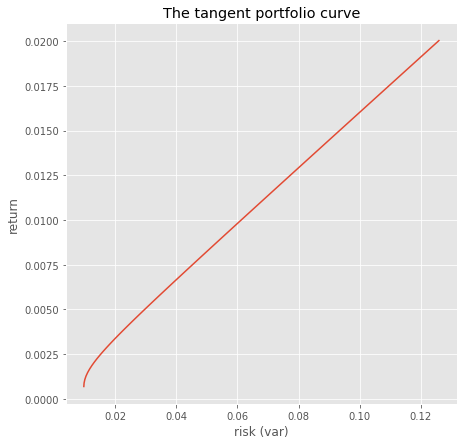

In [294]:
def get_efficient_portfolio(gamma:float):
    return (1-gamma) * X_tan_basket + gamma * X_mvp

eff_frontier = [get_efficient_portfolio(x) for x in np.linspace(-5, 1, 100)]
eff_rrs = [float(x@R) for x in eff_frontier]
eff_stds = [float(np.sqrt(x@C@x)) for x in eff_frontier]

plt.figure(figsize=(7,7))
plt.title("The tangent portfolio curve")
plt.plot(eff_stds, eff_rrs)
plt.xlabel("risk (var)")
plt.ylabel("return")
plt.show()

## Question D

In [295]:
X_mvp_return = X_mvp @ R
X_mvp_std = np.sqrt(X_mvp @ C @ X_mvp)

X_tan_basket_return = X_tan_basket @ R
X_tan_basket_std = np.sqrt(X_tan_basket @ C @ X_tan_basket)

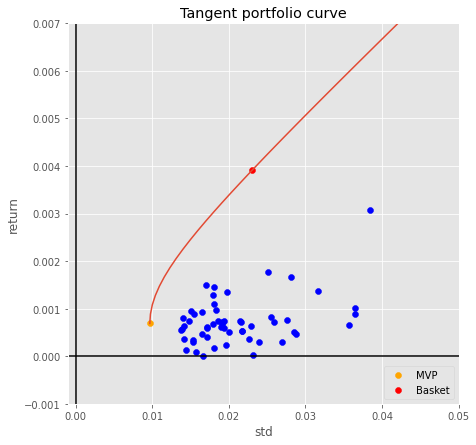

In [296]:
plt.figure(figsize=(7,7))
plt.title("Tangent portfolio curve")

# portfolios
plt.scatter(rr_stds, rr_means, c="blue")
plt.scatter(X_mvp_std, X_mvp_return, color="orange", label="MVP")
plt.scatter(X_tan_basket_std, X_tan_basket_return, color="red", label="Basket")

# curve
plt.plot(eff_stds, eff_rrs)

plt.legend(loc="best")

plt.xlabel("std")
plt.ylabel("return")

plt.xlim((-0.001, 0.05))
plt.ylim((-0.001,0.007))

plt.axvline(x=0, color='black')
plt.axhline(y=0, color="black")

plt.show()

## Question E

Tangent portfolio using risk free assert with $ R_f=0.05 / 250$

In [297]:
R_f = 0.05 / 250
X_tan = C_inv @ (R-R_f)
# X_tan = X_tan * 1*(X_tan > eps) # ignore very small investments
X_tan /= X_tan.sum()
X_tan.sum(), X_tan

(0.9999999999999993,
 array([-0.14224745, -0.00588737, -0.0769932 , -0.21097983, -0.00971373,
        -0.06492044,  0.11393791, -0.18726619, -0.38734986, -1.04315963,
        -0.06031763, -0.04946316,  0.67181574,  0.15949412,  0.18161815,
        -0.35386141,  0.45763294, -0.80156863, -0.30744744, -0.16110395,
         0.04442061, -0.26035074,  0.20106583,  0.40780316,  0.11403434,
        -0.43620269, -0.08988591, -0.45335082,  0.47208092,  1.29199852,
        -0.22834994,  0.40743929,  0.06397576,  0.24142699, -0.19050156,
        -0.20000741,  0.07601815,  0.57026897,  0.07141648,  0.15142476,
        -0.53400402,  0.33015717,  0.38084889,  0.00150905, -0.24030592,
         0.2102781 ,  0.27417555,  0.13258024,  0.04538709,  0.14255451,
         0.24088169,  0.11460545,  0.25084029, -0.13279077, -0.193661  ]))

## Question F

Finding the investment line:

$$
R_p = R_f + m \cdot \sigma_p  
$$

$$
m = (\bar R_A - R_f) / \sigma_A
$$

In [298]:
R_tan = X_tan @ R
SD_tan = np.sqrt(X_tan @ C @ X_tan)
slope = (R_tan - R_f) / SD_tan

print(R_f, slope)

0.0002 0.1620967210411068


The investment line:

$$
R_p = 0.0002 + 0.1621 * \sigma_p
$$

## Question G

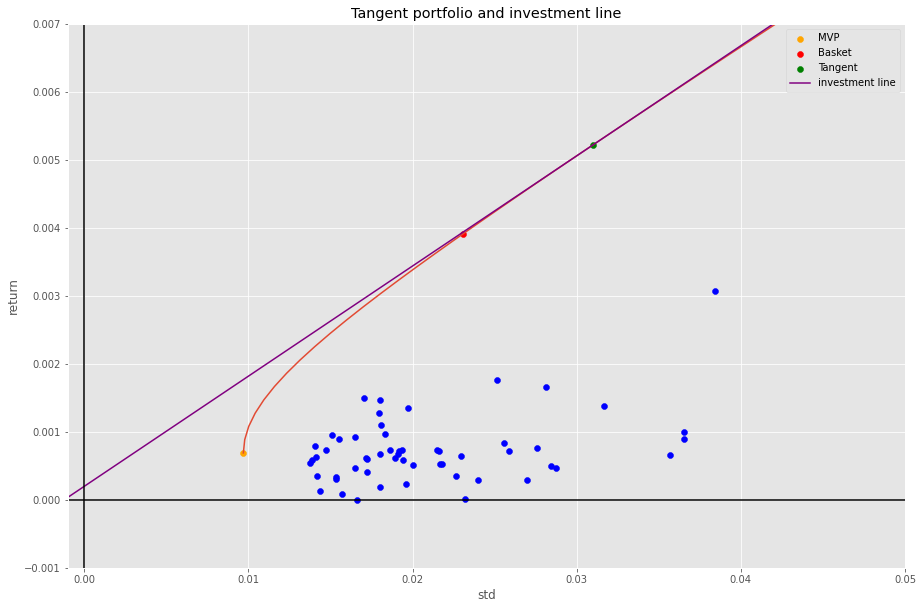

In [299]:
def inv_line(s):
    return R_f + s * slope

x0 = 0
y0 = inv_line(x0)

plt.figure(figsize=(15,10))
plt.title("Tangent portfolio and investment line")

# portfolios
plt.scatter(rr_stds, rr_means, c="blue")
plt.scatter(X_mvp_std, X_mvp_return, color="orange", label="MVP")
plt.scatter(X_tan_basket_std, X_tan_basket_return, color="red", label="Basket")
plt.scatter(SD_tan, R_tan, color="green", label="Tangent")

# curve
plt.plot(eff_stds, eff_rrs)

# investment line
plt.axline((x0,y0), slope=slope, color="purple", label="investment line")

plt.legend(loc="best")

plt.xlabel("std")
plt.ylabel("return")

plt.xlim((-0.001, 0.05))
plt.ylim((-0.001,0.007))

plt.axvline(x=0, color='black')
plt.axhline(y=0, color="black")

plt.show()

## Question H

Q: How does the investment line relate to the efficient frontier?

A: The investment line is tangent to the efficient frontier curve. Intersecting with the curve at the risk-return point of the tangent portfolio (with risk-free assets)

## Question I

In [300]:
def calc_mvp_portfolio(window):    
    C = window.cov()
    C_inv = np.linalg.inv(C)
    e = np.ones(C_inv.shape[0])
    _mvp = C_inv @ e / (e @ C_inv @ e)
    _mvp /= _mvp.sum() # renormalize the weights

    window_mean = window.mean(axis=0)
    _er = _mvp @ window_mean
    _std = np.sqrt(_mvp @ C @ _mvp)

    return _mvp, _er, _std

In [301]:
relative_returns

,AAP,AMCR,APH,ATVI,BBWI,BG,BR,BSX,BXP,C,...,RMD,SEDG,SPG,SRE,STLD,TER,TRGP,TSCO,V,WY
2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,0.008206,0.000000,0.007415,0.019651,0.011415,-0.013244,0.006674,0.009141,0.031766,0.013534,...,0.006457,0.090909,0.007995,0.008603,0.043358,0.005910,0.005002,0.011726,0.008176,0.008893
2017-01-05,-0.000698,0.000000,-0.005299,0.015525,-0.078705,-0.016190,-0.005123,-0.001359,0.004801,-0.017424,...,-0.007698,-0.041667,0.001738,-0.002353,0.005559,0.004309,0.012356,-0.015106,0.011728,0.010447
2017-01-06,-0.013091,0.000000,0.007548,-0.000791,-0.013056,-0.013502,0.004089,0.004535,-0.002275,0.003480,...,0.004364,-0.003623,0.013178,0.011399,-0.032114,0.000390,0.007120,-0.006214,0.013812,-0.003231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.018826,0.012865,0.021985,0.004450,0.004317,0.009982,0.023240,0.009363,0.014353,0.007308,...,0.012557,0.008154,0.019104,0.005795,0.017681,0.035762,0.034048,0.014018,0.004663,0.026398
2021-12-28,0.006892,0.004234,0.002186,0.018640,-0.016333,0.007358,-0.002819,0.002783,-0.005091,-0.000495,...,-0.004503,-0.023739,-0.004166,0.004840,-0.007013,-0.023434,-0.003807,-0.001296,0.001930,0.005043
2021-12-29,0.012178,0.007588,0.009412,0.007350,0.012234,0.005233,-0.004077,-0.001619,0.002342,-0.001320,...,0.000843,-0.002797,0.006275,0.005046,0.001124,0.013122,-0.007642,0.024181,0.000550,0.020572
2021-12-30,-0.014562,0.000837,-0.010462,0.004914,0.002878,-0.001627,-0.001856,-0.004169,0.009773,-0.001817,...,0.003370,0.015501,0.008062,0.002434,-0.003703,-0.018289,-0.008471,-0.000169,-0.001375,0.007129


In [302]:
np.any(relative_returns[2:-2])

True

In [303]:
N = len(relative_returns)

# iterate on windows of 500 days
# 500 + 2 to ignore NaN first 2 days
# N-1 since the last window doesn't have "next day"

p500_data = []
for i in tqdm(range(500 + 2, N-1)):
    rr_window = relative_returns.iloc[i-500:i]
    rr_window = rr_window.dropna(how="all", axis=1) # remove columns with no values
    next_day_returns = relative_returns[rr_window.columns].iloc[i+1]
    window_mean = rr_window.mean(axis=0)
    
    C = rr_window.cov()
    C_inv = np.linalg.inv(C)
    e = np.ones(C_inv.shape[0])
    
    # mvp
    x_mvp = C_inv @ e / (e @ C_inv @ e)
    x_mvp /= x_mvp.sum() # renormalize the weights

    # tangent basket
    x_basket = C_inv @ window_mean
    x_basket /= x_basket.sum()

    p500_data.append({
        "mvp_er": x_mvp @ window_mean,
        "mvp_std": np.sqrt(x_mvp @ C @ x_mvp),
        "basket_er": x_basket @ window_mean,
        "basket_std": np.sqrt(x_basket @ C @ x_basket),
        "true_mvp_return": next_day_returns.values @ x_mvp,
        "true_basket_return": next_day_returns.values @ x_basket,
    })


  9%|▉         | 71/802 [00:00<00:06, 119.88it/s]/var/folders/wd/57_v9c5142x7mhyp18nb4bt80000gn/T/ipykernel_43257/2501268111.py:30: RuntimeWarning: invalid value encountered in sqrt
  "basket_std": np.sqrt(x_basket @ C @ x_basket),
 52%|█████▏    | 416/802 [00:04<00:03, 108.37it/s]/var/folders/wd/57_v9c5142x7mhyp18nb4bt80000gn/T/ipykernel_43257/2501268111.py:28: RuntimeWarning: invalid value encountered in sqrt
  "mvp_std": np.sqrt(x_mvp @ C @ x_mvp),
100%|██████████| 802/802 [00:06<00:00, 123.77it/s]


### Question I.2

MVP mean return and return STD using the rolling window:

In [304]:
mvp_window_returns = np.array([x['mvp_er'] for x in p500_data if not np.isnan(x['mvp_er'])])
mvp_window_stds = np.array([x['mvp_std'] for x in p500_data if not np.isnan(x['mvp_std'])])

print("MVP mean return", mvp_window_returns.mean())
print("MVP mean return std", mvp_window_stds.mean())

MVP mean return 0.0003300164091093854
MVP mean return std 0.007449659154245524


Tangent basket portfolio mean return and return STD using the rolling window:

In [305]:
basket_window_returns = np.array([x['basket_er'] for x in p500_data if not np.isnan(x['basket_er'])])
basket_window_stds = np.array([x['basket_std'] for x in p500_data if not np.isnan(x['basket_std'])])

print("Tangent Basket mean return", basket_window_returns.mean())
print("Tangent Basket mean return std", basket_window_stds.mean())

Tangent Basket mean return 0.009730515147208121
Tangent Basket mean return std 0.10216534034139806


In [306]:
true_mvp_returns = np.array([x['true_mvp_return'] for x in p500_data if not np.isnan(x['true_mvp_return'])])
print("True MVP mean return", true_mvp_returns.mean())
print("True MVP mean return std", true_mvp_returns.std())

true_basket_returns = np.array([x['true_basket_return'] for x in p500_data if not np.isnan(x['true_basket_return'])])
print("True basket mean return", true_basket_returns.mean())
print("True basket mean return std", true_basket_returns.std())

True MVP mean return 0.001080176084626173
True MVP mean return std 0.017605542859996815
True basket mean return -0.006125895399751194
True basket mean return std 0.683081686607593


## Question I.3

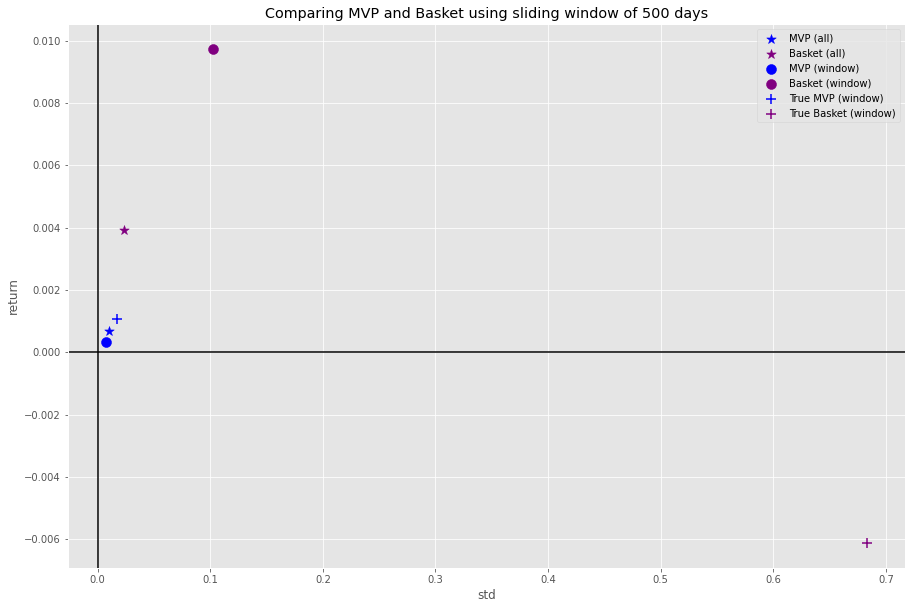

In [308]:
plt.figure(figsize=(15,10))
plt.title("Comparing MVP and Basket using sliding window of 500 days")

# portfolios
# MVP on all data
plt.scatter(X_mvp_std, X_mvp_return, color="blue", label="MVP (all)", marker="*", s=100)

# Tangent basket on all data
plt.scatter(X_tan_basket_std, X_tan_basket_return, color="purple", label="Basket (all)", marker="*", s=100)

# MVP on sliding window of 500 days
plt.scatter(mvp_window_stds.mean(), mvp_window_returns.mean(), color="blue", label="MVP (window)", s=100)

# Tangent basket on sliding window of 500 days
plt.scatter(basket_window_stds.mean(), basket_window_returns.mean(), color="purple", label="Basket (window)", s=100)

# True values on sliding window of 500 days
plt.scatter(true_mvp_returns.std(), true_mvp_returns.mean(), color="blue", label="True MVP (window)", marker="+", s=100)
plt.scatter(true_basket_returns.std(), true_basket_returns.mean(), color="purple", label="True Basket (window)", marker="+", s=100)


plt.legend(loc="best")

plt.xlabel("std")
plt.ylabel("return")

plt.axvline(x=0, color='black')
plt.axhline(y=0, color="black")

plt.show()

## Question J

Q: What is the difference between expected to actual value point?

A: In the MVP the actual value had a **better return than expected**.  
However, in the best basket, for both sliding window and all data, the **actual return was worst than expected**

We can try to explaing this using the nature of both portfolios:
- MVP is more conservative, looking to minimize risk and sticking to stocks that are more certain on their return.
- Best basket is theoretically optimal, and seeking efficiency, however the stock market usually doesn't conform to theoretical promises (if that was the case everyone would apply the same theoretical solution and "win", that is impossible in markets)

## Question K

Q: What is a possible solution?

A: Either stick to the MVP and minimize your risks, or estimate the expected return better, e.g., using more complex model, such neural network or large decision trees.